In [3]:
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import numpy as np
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects

In [64]:
pos_p = pd.read_html("https://fbref.com/en/comps/Big5/2018-2019/gca/players/2018-2019-Big-5-European-Leagues-Stats")[0]
pos_r = pd.read_html("https://fbref.com/en/comps/Big5/2018-2019/possession/players/2018-2019-Big-5-European-Leagues-Stats")[0]
pd.set_option('display.max_columns', None)

In [65]:
pos_p = pos_p.droplevel(0, axis=1)

In [66]:
pos_p.to_csv('fbref_pepe_1819.csv')

In [67]:
pos_p = pd.read_csv('./fbref_pepe_1819.csv')

In [68]:
pos_p

,Unnamed: 0,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,OG,Matches
0,0,1,Ismael Aaneba,fr FRA,DF,Strasbourg,fr Ligue 1,19,1999,2.3,2,0.88,2,0,0,0,0,0,0.00,0,0,0,0,0,0,Matches
1,1,2,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,27,1990,35.5,71,2.00,59,7,1,2,2,6,0.17,5,1,0,0,0,0,Matches
2,2,3,Ignazio Abate,it ITA,DF,Milan,it Serie A,31,1986,14.5,18,1.24,18,0,0,0,0,0,0.00,0,0,0,0,0,0,Matches
3,3,4,Issah Abbas,gh GHA,FW,Mainz 05,de Bundesliga,19,1998,0.1,0,0.00,0,0,0,0,0,0,0.00,0,0,0,0,0,0,Matches
4,4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,30,1987,38.0,20,0.53,15,0,3,2,0,1,0.03,1,0,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,2759,2654,Ervin Zukanović,ba BIH,DF,Genoa,it Serie A,31,1987,21.8,17,0.78,14,1,0,1,1,2,0.09,2,0,0,0,0,0,Matches
2760,2760,2655,Bongani Zungu,za RSA,MF,Amiens,fr Ligue 1,25,1992,2.6,4,1.57,4,0,0,0,0,0,0.00,0,0,0,0,0,0,Matches
2761,2761,2656,David Zurutuza,es ESP,"MF,FW",Real Sociedad,es La Liga,32,1986,13.6,19,1.40,17,0,0,0,2,0,0.00,0,0,0,0,0,0,Matches
2762,2762,2657,Filip Đorđević,rs SRB,FW,Chievo,it Serie A,30,1987,7.0,10,1.42,6,0,1,2,1,0,0.00,0,0,0,0,0,0,Matches


In [69]:
pos_p = pos_p[['Player','Pos','Squad','Comp','Age','90s', 'Drib', 'Fld']]

In [70]:
pos_r = pos_r.droplevel(0, axis=1)

In [71]:
pos_r = pos_r[['Player','Touches','Att']]

In [72]:
cols_to_use = pos_r.columns.difference(pos_p.columns)

In [73]:
df = pd.merge(pos_p, pos_r[cols_to_use], left_index=True, right_index=True, how='outer')

In [74]:
df

,Player,Pos,Squad,Comp,Age,90s,Drib,Fld,Att,Touches
0,Ismael Aaneba,DF,Strasbourg,fr Ligue 1,19,2.3,0,0,3,157
1,Patrick van Aanholt,DF,Crystal Palace,eng Premier League,27,35.5,1,2,43,2298
2,Ignazio Abate,DF,Milan,it Serie A,31,14.5,0,0,9,1056
3,Issah Abbas,FW,Mainz 05,de Bundesliga,19,0.1,0,0,1,5
4,Yunis Abdelhamid,DF,Reims,fr Ligue 1,30,38.0,3,0,24,2023
...,...,...,...,...,...,...,...,...,...,...
2759,Ervin Zukanović,DF,Genoa,it Serie A,31,21.8,0,1,8,1210
2760,Bongani Zungu,MF,Amiens,fr Ligue 1,25,2.6,0,0,2,136
2761,David Zurutuza,"MF,FW",Real Sociedad,es La Liga,32,13.6,0,2,18,792
2762,Filip Đorđević,FW,Chievo,it Serie A,30,7.0,1,1,8,270


In [75]:
# df = pd.merge(df, df1[cols_to_use], left_index=True, right_index=True, how='outer')

df['90s'] = df['90s'].apply(pd.to_numeric, errors='coerce')
df['Drib'] = df['Drib'].apply(pd.to_numeric, errors='coerce')
df['Fld'] = df['Fld'].apply(pd.to_numeric, errors='coerce')
df['Att'] = df['Att'].apply(pd.to_numeric, errors='coerce')
df['Touches'] = df['Touches'].apply(pd.to_numeric, errors='coerce')

In [76]:
# Filter for Defenders who have played at least 500 minutes
mask = (df['90s']>17)
df = df.loc[mask]

In [77]:
df

,Player,Pos,Squad,Comp,Age,90s,Drib,Fld,Att,Touches
1,Patrick van Aanholt,DF,Crystal Palace,eng Premier League,27,35.5,1.0,2.0,43.0,2298.0
4,Yunis Abdelhamid,DF,Reims,fr Ligue 1,30,38.0,3.0,0.0,24.0,2023.0
5,Mehdi Abeid,MF,Dijon,fr Ligue 1,25,22.5,3.0,1.0,61.0,1356.0
9,Francesco Acerbi,DF,Lazio,it Serie A,30,36.8,0.0,3.0,11.0,2162.0
14,Khaled Adénon,DF,Amiens,fr Ligue 1,33,22.2,0.0,1.0,2.0,1192.0
...,...,...,...,...,...,...,...,...,...,...
2746,Piotr Zieliński,"MF,FW",Napoli,it Serie A,24,31.9,4.0,2.0,81.0,2356.0
2748,Matthias Zimmermann,"DF,MF",Düsseldorf,de Bundesliga,26,33.9,2.0,1.0,33.0,2014.0
2752,Kurt Zouma,DF,Everton,eng Premier League,23,29.0,1.0,0.0,7.0,1746.0
2754,Igor Zubeldia,MF,Real Sociedad,es La Liga,21,28.3,0.0,0.0,48.0,1505.0


In [92]:
df['Drib+Fld'] = df['Drib']+df['Fld']
df['drib-ptouch'] = df['Att']/df['Touches']

In [93]:
# Remove non-numerical data
all_columns = list(df.columns)
unwanted_columns = {'Player', 'Pos', 'Squad', 'Comp', 'Age','90s'}
index_columns = [ele for ele in all_columns if ele not in unwanted_columns]

In [94]:
dfP90 = df.loc[:,index_columns].div(df['90s'], axis=0)

In [95]:
# P90 Dataframe
master_df = pd.concat([df[['Player', 'Pos', 'Squad', 'Comp', 'Age', '90s']], dfP90], axis = 1)
master_df.head(5)

,Player,Pos,Squad,Comp,Age,90s,Drib,Fld,Att,Touches,Drib+Fld,drib-ptouch
1,Patrick van Aanholt,DF,Crystal Palace,eng Premier League,27,35.5,0.028169,0.056338,1.211268,64.732394,0.084507,0.000527
4,Yunis Abdelhamid,DF,Reims,fr Ligue 1,30,38.0,0.078947,0.000000,0.631579,53.236842,0.078947,0.000312
5,Mehdi Abeid,MF,Dijon,fr Ligue 1,25,22.5,0.133333,0.044444,2.711111,60.266667,0.177778,0.001999
9,Francesco Acerbi,DF,Lazio,it Serie A,30,36.8,0.000000,0.081522,0.298913,58.750000,0.081522,0.000138
14,Khaled Adénon,DF,Amiens,fr Ligue 1,33,22.2,0.000000,0.045045,0.090090,53.693694,0.045045,0.000076


In [96]:
mask=master_df['Player']=='Nicolas Pépé'
master_df[mask]

,Player,Pos,Squad,Comp,Age,90s,Drib,Fld,Att,Touches,Drib+Fld,drib-ptouch
1986,Nicolas Pépé,"FW,MF",Lille,fr Ligue 1,23,36.9,0.650407,0.731707,5.447154,51.734417,1.382114,0.002853


In [97]:
master_df.fillna(0)

,Player,Pos,Squad,Comp,Age,90s,Drib,Fld,Att,Touches,Drib+Fld,drib-ptouch
1,Patrick van Aanholt,DF,Crystal Palace,eng Premier League,27,35.5,0.028169,0.056338,1.211268,64.732394,0.084507,0.000527
4,Yunis Abdelhamid,DF,Reims,fr Ligue 1,30,38.0,0.078947,0.000000,0.631579,53.236842,0.078947,0.000312
5,Mehdi Abeid,MF,Dijon,fr Ligue 1,25,22.5,0.133333,0.044444,2.711111,60.266667,0.177778,0.001999
9,Francesco Acerbi,DF,Lazio,it Serie A,30,36.8,0.000000,0.081522,0.298913,58.750000,0.081522,0.000138
14,Khaled Adénon,DF,Amiens,fr Ligue 1,33,22.2,0.000000,0.045045,0.090090,53.693694,0.045045,0.000076
...,...,...,...,...,...,...,...,...,...,...,...,...
2746,Piotr Zieliński,"MF,FW",Napoli,it Serie A,24,31.9,0.125392,0.062696,2.539185,73.855799,0.188088,0.001078
2748,Matthias Zimmermann,"DF,MF",Düsseldorf,de Bundesliga,26,33.9,0.058997,0.029499,0.973451,59.410029,0.088496,0.000483
2752,Kurt Zouma,DF,Everton,eng Premier League,23,29.0,0.034483,0.000000,0.241379,60.206897,0.034483,0.000138
2754,Igor Zubeldia,MF,Real Sociedad,es La Liga,21,28.3,0.000000,0.000000,1.696113,53.180212,0.000000,0.001127


In [98]:
# df['Drib-Fld pAtt'] = df['Drib+Fld']/df['Att']
# df

In [99]:
master_df.to_csv('fbref_pepe_1819.csv')

In [100]:
master_df = pd.read_csv('./fbref_pepe_1819.csv')

In [101]:
players = master_df['Player'].tolist()

In [102]:
# Drop columns
df1 = master_df.drop(['Player', 'Pos', 'Squad', 'Comp', 'Age', '90s'], axis=1)

In [103]:
#Normalize data
DFNom = df1.transform(lambda x: (x - x.min())/ (x.max() - x.min()))

In [104]:
master_df = pd.concat([master_df[['Player','Pos','Squad','Comp','Age']], DFNom], axis = 1)
master_df.head()

,Player,Pos,Squad,Comp,Age,Unnamed: 0,Drib,Fld,Att,Touches,Drib+Fld,drib-ptouch
0,Patrick van Aanholt,DF,Crystal Palace,eng Premier League,27,0.000000,0.022535,0.060563,0.110635,0.588697,0.040376,0.056918
1,Yunis Abdelhamid,DF,Reims,fr Ligue 1,30,0.001088,0.063158,0.000000,0.057688,0.483358,0.037719,0.033712
2,Mehdi Abeid,MF,Dijon,fr Ligue 1,25,0.001450,0.106667,0.047778,0.247629,0.547776,0.084938,0.215896
3,Francesco Acerbi,DF,Lazio,it Serie A,30,0.002901,0.000000,0.087636,0.027302,0.533878,0.038949,0.014930
4,Khaled Adénon,DF,Amiens,fr Ligue 1,33,0.004714,0.000000,0.048423,0.008229,0.487544,0.021522,0.008161


In [106]:
# master_df['SCA_DFF'] = master_df['Drib+Fld']/master_df['Att']

In [107]:
master_df

,Player,Pos,Squad,Comp,Age,Unnamed: 0,Drib,Fld,Att,Touches,Drib+Fld,drib-ptouch
0,Patrick van Aanholt,DF,Crystal Palace,eng Premier League,27,0.000000,0.022535,0.060563,0.110635,0.588697,0.040376,0.056918
1,Yunis Abdelhamid,DF,Reims,fr Ligue 1,30,0.001088,0.063158,0.000000,0.057688,0.483358,0.037719,0.033712
2,Mehdi Abeid,MF,Dijon,fr Ligue 1,25,0.001450,0.106667,0.047778,0.247629,0.547776,0.084938,0.215896
3,Francesco Acerbi,DF,Lazio,it Serie A,30,0.002901,0.000000,0.087636,0.027302,0.533878,0.038949,0.014930
4,Khaled Adénon,DF,Amiens,fr Ligue 1,33,0.004714,0.000000,0.048423,0.008229,0.487544,0.021522,0.008161
...,...,...,...,...,...,...,...,...,...,...,...,...
1121,Piotr Zieliński,"MF,FW",Napoli,it Serie A,24,0.995286,0.100313,0.067398,0.231926,0.672300,0.089864,0.116379
1122,Matthias Zimmermann,"DF,MF",Düsseldorf,de Bundesliga,26,0.996012,0.047198,0.031711,0.088914,0.539926,0.042281,0.052193
1123,Kurt Zouma,DF,Everton,eng Premier League,23,0.997462,0.027586,0.000000,0.022047,0.547228,0.016475,0.014928
1124,Igor Zubeldia,MF,Real Sociedad,es La Liga,21,0.998187,0.000000,0.000000,0.154921,0.482839,0.000000,0.121696


In [120]:
mask=master_df['Player']=='Nicolas Pépé'
pepe = master_df[mask]

In [115]:
high = (master_df['Drib+Fld'] > 0.6) & (master_df['Drib'] > 0.49)
high_volume = master_df.loc[high]
high_volume

,Player,Pos,Squad,Comp,Age,Unnamed: 0,Drib,Fld,Att,Touches,Drib+Fld,drib-ptouch
150,Sofiane Boufal,"MF,FW",Celta Vigo,es La Liga,24,0.122190,1.000000,0.648707,1.000000,0.510179,0.885536,0.907315
238,Joaquín Correa,"FW,MF",Lazio,it Serie A,23,0.197970,0.672897,0.552570,0.482302,0.501656,0.647456,0.482396
454,Eden Hazard,FW,Chelsea,eng Premier League,27,0.389775,0.664615,0.826923,0.573325,0.689411,0.764444,0.275418
490,Josip Iličić,"FW,MF",Atalanta,it Serie A,30,0.419144,0.840336,0.451681,0.648581,0.653138,0.702614,0.448930
706,Lionel Messi,FW,Barcelona,es La Liga,31,0.610587,0.930233,1.000000,0.737385,0.724645,1.000000,0.363991
825,Nicolas Pépé,"FW,MF",Lille,fr Ligue 1,23,0.719724,0.520325,0.786585,0.497535,0.469590,0.660343,0.308120
931,Allan Saint-Maximin,"FW,MF",Nice,fr Ligue 1,21,0.811095,0.869565,0.434006,0.734680,0.412717,0.712215,0.592470
994,Naïm Sliti,"MF,FW",Dijon,fr Ligue 1,26,0.867658,0.566929,0.592520,0.445905,0.477508,0.601925,0.394583
1114,Wilfried Zaha,FW,Crystal Palace,eng Premier League,25,0.987310,0.664688,0.542285,0.666745,0.464030,0.637982,0.457485


In [117]:
longlist = ((master_df['Drib+Fld'] < 0.5) & (master_df['Drib'] < 0.5))
longlist = master_df.loc[longlist]
longlist

,Player,Pos,Squad,Comp,Age,Unnamed: 0,Drib,Fld,Att,Touches,Drib+Fld,drib-ptouch
0,Patrick van Aanholt,DF,Crystal Palace,eng Premier League,27,0.000000,0.022535,0.060563,0.110635,0.588697,0.040376,0.056918
1,Yunis Abdelhamid,DF,Reims,fr Ligue 1,30,0.001088,0.063158,0.000000,0.057688,0.483358,0.037719,0.033712
2,Mehdi Abeid,MF,Dijon,fr Ligue 1,25,0.001450,0.106667,0.047778,0.247629,0.547776,0.084938,0.215896
3,Francesco Acerbi,DF,Lazio,it Serie A,30,0.002901,0.000000,0.087636,0.027302,0.533878,0.038949,0.014930
4,Khaled Adénon,DF,Amiens,fr Ligue 1,33,0.004714,0.000000,0.048423,0.008229,0.487544,0.021522,0.008161
...,...,...,...,...,...,...,...,...,...,...,...,...
1121,Piotr Zieliński,"MF,FW",Napoli,it Serie A,24,0.995286,0.100313,0.067398,0.231926,0.672300,0.089864,0.116379
1122,Matthias Zimmermann,"DF,MF",Düsseldorf,de Bundesliga,26,0.996012,0.047198,0.031711,0.088914,0.539926,0.042281,0.052193
1123,Kurt Zouma,DF,Everton,eng Premier League,23,0.997462,0.027586,0.000000,0.022047,0.547228,0.016475,0.014928
1124,Igor Zubeldia,MF,Real Sociedad,es La Liga,21,0.998187,0.000000,0.000000,0.154921,0.482839,0.000000,0.121696


In [118]:
high_pass = (master_df['Drib+Fld'] > 0.5) & ((master_df['Drib'] > 0) & (master_df['Drib'] < 0.5))
high_passer = master_df.loc[high_pass]
high_passer.head()

,Player,Pos,Squad,Comp,Age,Unnamed: 0,Drib,Fld,Att,Touches,Drib+Fld,drib-ptouch
684,Kylian Mbappé,FW,Paris S-G,fr Ligue 1,19,0.592458,0.492308,0.5375,0.463719,0.412461,0.532906,0.463418


In [124]:
high_carry = (master_df['Drib'] > 0.5) & ((master_df['Drib+Fld'] > 0) & (master_df['Drib+Fld'] < 0.5))
high_carrier = master_df.loc[high_carry]
high_carrier

,Player,Pos,Squad,Comp,Age,Unnamed: 0,Drib,Fld,Att,Touches,Drib+Fld,drib-ptouch
64,Youcef Attal,"DF,MF",Nice,fr Ligue 1,22,0.049674,0.541833,0.342629,0.727797,0.639888,0.475874,0.487493
469,Son Heung-min,"FW,MF",Tottenham,eng Premier League,26,0.399565,0.563877,0.142070,0.390301,0.434724,0.399902,0.424105
881,Ante Rebić,"FW,MF",Eint Frankfurt,de Bundesliga,24,0.769761,0.509091,0.390909,0.386113,0.370392,0.477778,0.507194
1012,Raheem Sterling,FW,Manchester City,eng Premier League,23,0.887600,0.571429,0.314123,0.421106,0.520638,0.480880,0.282065
1024,Suso,"FW,MF",Milan,it Serie A,24,0.898115,0.620896,0.160448,0.348995,0.578704,0.442123,0.193524
1038,Sada Thioub,"FW,MF",Nîmes,fr Ligue 1,23,0.912980,0.610909,0.156364,0.418497,0.445033,0.434343,0.366761
1119,Duván Zapata,FW,Atalanta,it Serie A,27,0.990935,0.546584,0.166925,0.314863,0.364623,0.400621,0.287001


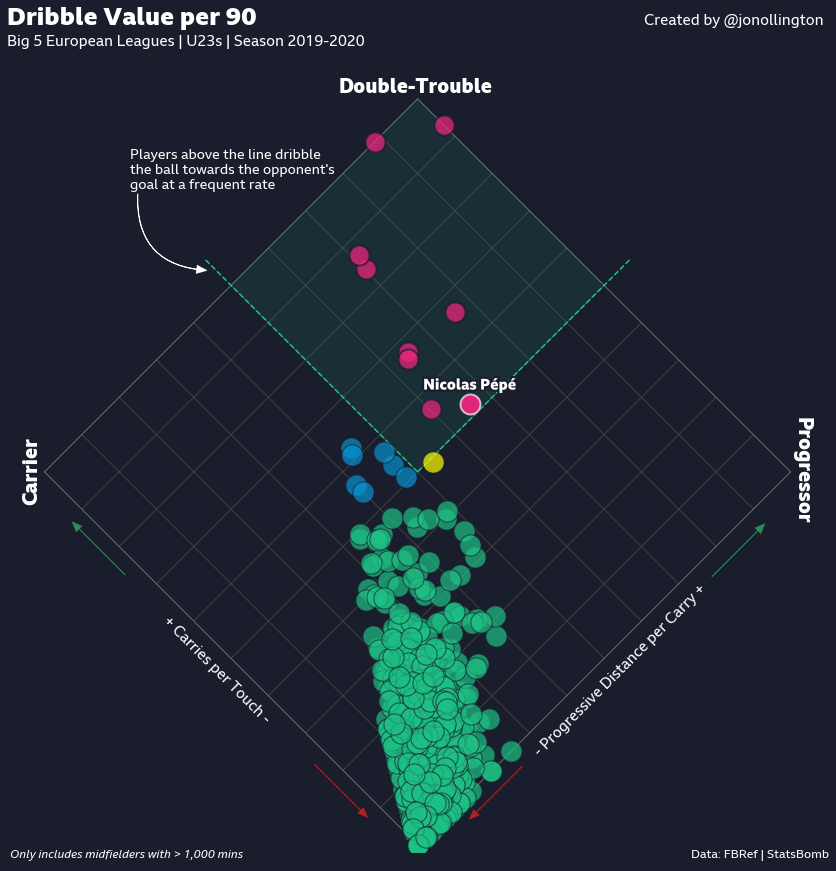

In [125]:
def setup_axes1(fig, rect):
    """
    Rotated Axis
    """
    tr = Affine2D().scale(9, 9).rotate_deg(45)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, 1, 0, 1))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    aux_ax = ax1.get_aux_axes(tr)

    grid_helper.grid_finder.grid_locator1._nbins = 10
    grid_helper.grid_finder.grid_locator2._nbins = 10

    return ax1, aux_ax


##########################################################
fig = plt.figure(2, figsize=(38, 14))
fig.subplots_adjust(wspace=1, left=0.5, right=2)

ax1, aux_ax1 = setup_axes1(fig, 131)

csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}

#add gridlines to main viz and remove ticks
ax1.grid(zorder=1,color="#484848")

plt.rc('axes',edgecolor='grey')
plt.tick_params(color='none')

#remove label colors
COLOR = '#1a1d2c'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

#add scatter plots
aux_ax1.scatter(high_volume['Drib+Fld'], high_volume['Drib'], s=400, facecolors='#f62681', edgecolors=COLOR, lw=2,zorder=4,alpha=0.7)

#add scatter plots
aux_ax1.scatter(pepe['Drib+Fld'], pepe['Drib'], s=400, facecolors='#f62681', edgecolors='white', lw=2,zorder=5,alpha=0.7)


dx, dy = pepe['Drib+Fld'].values, pepe['Drib'].values
for i in range(len(pepe)):
    if pepe.Player.iloc[i] == "Nicolas Pépé":
        n = aux_ax1.text(dx[i]+0.02,dy[i]+0.02,pepe.Player.iloc[i],ha="center",color="white",zorder=6, **csfont, size=15, fontweight="bold")
        
n.set_path_effects([path_effects.withStroke(linewidth=4,foreground=COLOR)])

#high passer
aux_ax1.scatter(high_passer['Drib+Fld'], high_passer['Drib'], s=450, facecolors='#ffff00', edgecolors='#1a1d2c', zorder=4,alpha=0.7)

#high passer
aux_ax1.scatter(high_carrier['Drib+Fld'], high_carrier['Drib'], s=450, facecolors='#0892d0', edgecolors='#1a1d2c', zorder=4,alpha=0.7)

aux_ax1.scatter(longlist['Drib+Fld'], longlist['Drib'], s=450, facecolors='#1ec185', edgecolors='#1a1d2c', zorder=4,alpha=0.7)


aux_ax1.plot([0.5,0.5],[0.5,1.07],color="#19c485",zorder=3, alpha=1, ls="--")
aux_ax1.plot([0.5,1.07],[0.5,0.5],color="#19c485",zorder=3, alpha=1, ls="--")

ax1.text(-7,14,"Dribble Value per 90",color="white",fontsize=25, **csfont, fontweight='bold')
ax1.text(-7,13.65,"Big 5 European Leagues | U23s | Season 2019-2020",color="white",fontsize=15, **csfont)
ax1.text(-1.35,12.85,"Double-Trouble",color="white",fontsize=20, **csfont, fontweight="bold")
ax1.text(-4.9,11.2,"Players above the line dribble\nthe ball towards the opponent's\ngoal at a frequent rate",
         color="white",fontsize=14, **csfont, horizontalalignment='left')
ax1.text(3.86,14,"Created by @jonollington",color="white",fontsize=15, **csfont)

ax1.text(6.38, 6.4, "Progressor", rotation=270, va='center', color="white", **csfont, fontsize=20, fontweight="bold")
ax1.text(-6.75, 6.4, "Carrier", rotation=90, va='center', color="white", **csfont, fontsize=20, fontweight="bold")

#add green square
rect = plt.Rectangle([0.5,0.5],0.5,0.5,color="#19c485",zorder=1,alpha=0.1)
aux_ax1.add_artist(rect)

#set figure background colour
fig.set_facecolor('#1a1d2c')
ax1.set_facecolor('#1a1d2c')

# Add fancy arrow

style="Simple,tail_width=0.4,head_width=8,head_length=10"
kw = dict(arrowstyle=style, color="white")
kwr = dict(arrowstyle=style, color="firebrick")
kwg = dict(arrowstyle=style, color="seagreen")
a = patches.FancyArrowPatch((0.5,1.25), (0.49,1.05),
                            connectionstyle="arc3,rad=0.5", **kw,zorder=20,lw=0.8) #curved arrow

b = patches.FancyArrowPatch((-0.03,0.25),(-0.03,0.1),
                            **kwr,zorder=20,lw=0.5) #straight arrow
c = patches.FancyArrowPatch((0.25,-0.035),(0.1,-0.035),
                            **kwr,zorder=20,lw=0.5) #straight arrow

d = patches.FancyArrowPatch((-0.03,0.75),(-0.03,0.9),
                            **kwg,zorder=20,lw=0.5) #straight arrow
e = patches.FancyArrowPatch((0.75,-0.035),(0.9,-0.035),
                            **kwg,zorder=20,lw=0.5) #straight arrow
aux_ax1.add_patch(a)
aux_ax1.add_patch(b)
aux_ax1.add_patch(c)
aux_ax1.add_patch(d)
aux_ax1.add_patch(e)

ax1.text(1.95,3, "- Progressive Distance per Carry +", rotation=45, va='center', color="white", **csfont, fontsize=15)
ax1.text(-4.4,3, "+ Carries per Touch -", rotation=315, va='center', color="white", **csfont, fontsize=15)


fig.text(0.501,0.12,"Only includes midfielders with > 1,000 mins",color="white",fontsize=12, **csfont, fontstyle="italic")
fig.text(0.75,0.12,"Data: FBRef | StatsBomb",color="white",fontsize=12, **csfont)
# fig.tight_layout()
plt.rcParams['savefig.facecolor']='#1a1d2c'
plt.savefig("ball_prog", dip=500, bbox_inches='tight')

In [ ]:
from PIL import Image

In [ ]:
img = Image.open('./SB_Regular_Alt.png')
img.size

In [ ]:
img = img.resize((107, 13), Image.ANTIALIAS)

In [ ]:
img